# Machine Learning-Based Energy Consumption Forecasting in Smart Grids

In [1]:
# Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor
import joblib
from feature_engine.outliers import Winsorizer
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [51]:
# Importing Dataset

In [52]:
df = pd.read_csv(r'Dataset\Cost_of_Living_Index.csv')
df

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Zurich,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Nassau,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Reykjavik,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Bridgetown,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Dhaka,22.5,2.4,12.8,25.7,12.8,33.1
117,118,Mumbai,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Cairo,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Tripoli,20.4,4.3,12.7,22.2,15.2,42.0


In [53]:
df=df.drop(columns=['Rank'])
df.head(2)

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Zurich,101.1,46.5,74.9,109.1,97.0,158.7
1,Nassau,85.0,36.7,61.8,81.6,83.3,54.6


In [55]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])

In [56]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])

In [10]:
df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,120,101.1,46.5,74.9,109.1,97.0,158.7
1,71,85.0,36.7,61.8,81.6,83.3,54.6
2,85,83.0,39.2,62.0,88.4,86.8,120.3
3,96,76.7,67.2,72.1,74.6,50.4,111.1
4,19,76.6,19.0,48.9,80.8,69.4,43.5


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City                            121 non-null    int64  
 1   Cost of Living Index            121 non-null    float64
 2   Rent Index                      121 non-null    float64
 3   Cost of Living Plus Rent Index  121 non-null    float64
 4   Groceries Index                 121 non-null    float64
 5   Restaurant Price Index          121 non-null    float64
 6   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 6.7 KB


In [58]:
df.isnull().sum()

City                              0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [59]:
df.describe()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,60.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,0.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,30.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,60.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,90.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,120.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


### Eda

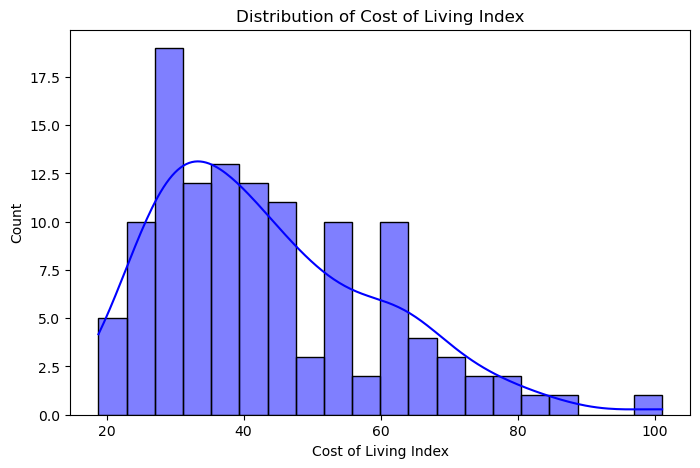

In [60]:
# 1. Histogram of Cost of Living Index
plt.figure(figsize=(8, 5))
sns.histplot(df['Cost of Living Index'], bins=20, kde=True, color='blue')
plt.title("Distribution of Cost of Living Index")
plt.show()


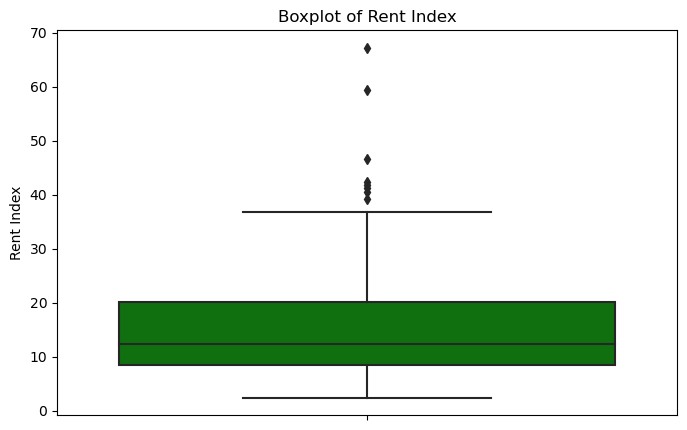

In [61]:
# 2. Boxplot of Rent Index
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Rent Index'], color='green')
plt.title("Boxplot of Rent Index")
plt.show()


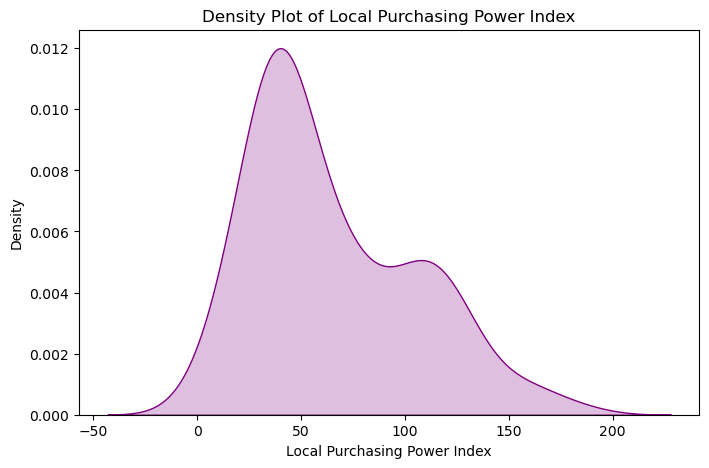

In [62]:
# 4. Density Plot for Local Purchasing Power Index
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Local Purchasing Power Index'], fill=True, color='purple')
plt.title("Density Plot of Local Purchasing Power Index")
plt.show()

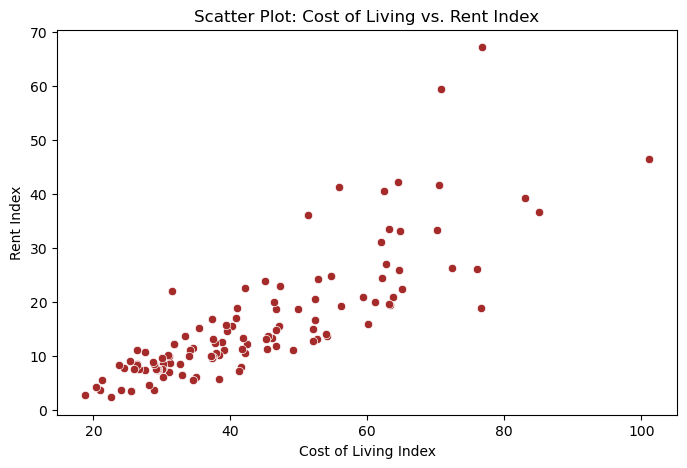

In [63]:
# 5. Scatter Plot between Cost of Living Index & Rent Index
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Cost of Living Index'], y=df['Rent Index'], color='brown')
plt.title("Scatter Plot: Cost of Living vs. Rent Index")
plt.show()


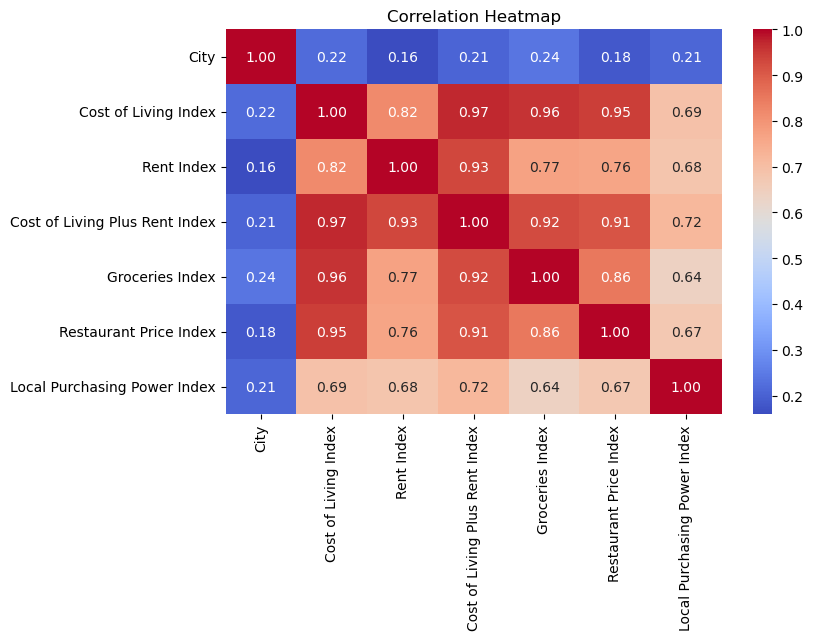

In [64]:
# 6. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


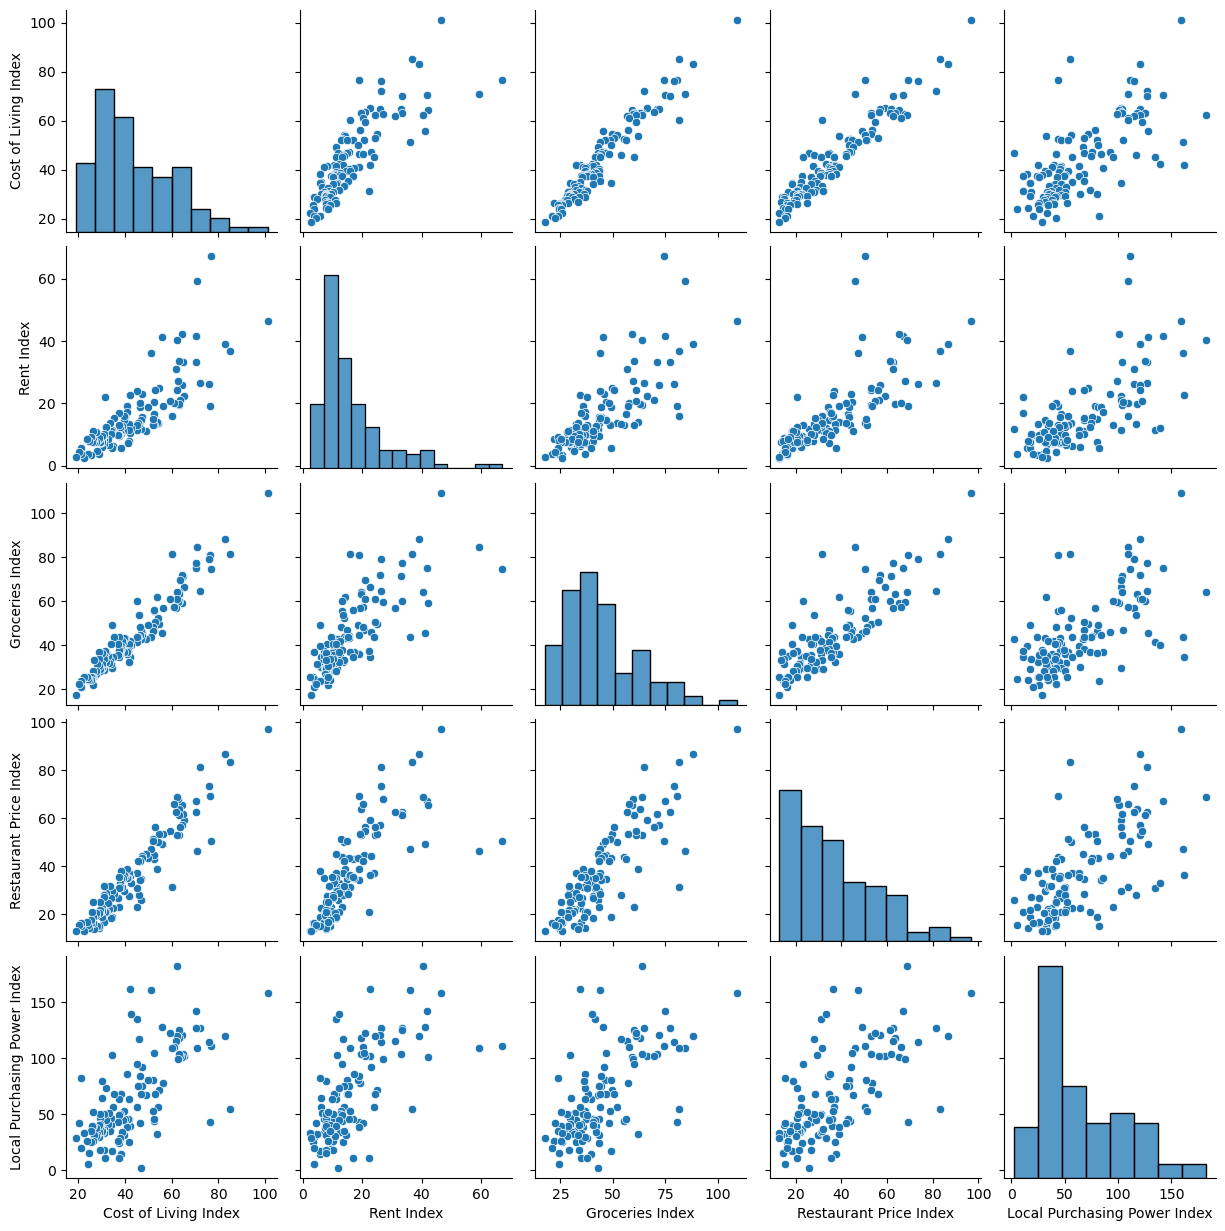

In [65]:
# 7. Pairplot to Show Relationships
sns.pairplot(df[['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']])
plt.show()

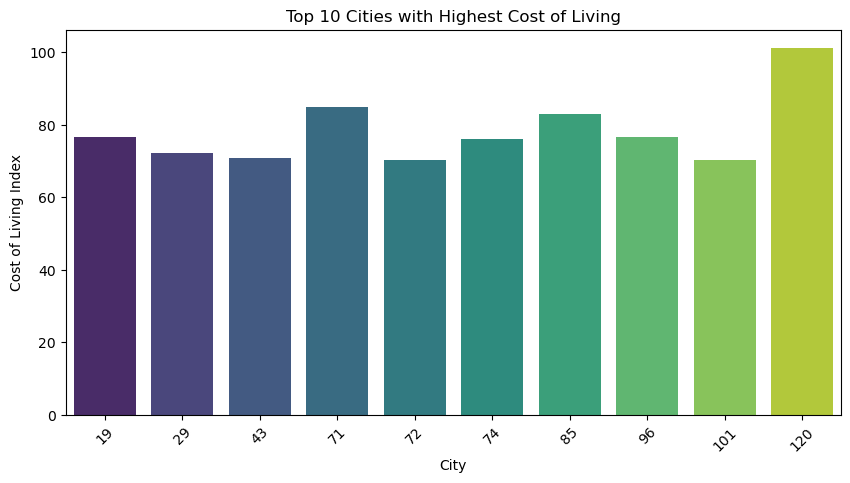

In [66]:
# 8. Bar Plot of Top 10 Cities with Highest Cost of Living
top_10 = df.nlargest(10, 'Cost of Living Index')
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10['City'], y=top_10['Cost of Living Index'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Highest Cost of Living")
plt.show()

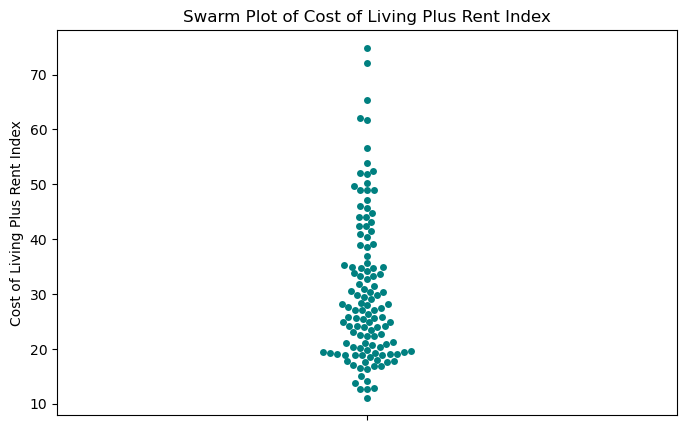

In [67]:

# 9. Swarm Plot of Cost of Living Plus Rent Index
plt.figure(figsize=(8, 5))
sns.swarmplot(y=df['Cost of Living Plus Rent Index'], color='teal')
plt.title("Swarm Plot of Cost of Living Plus Rent Index")
plt.show()

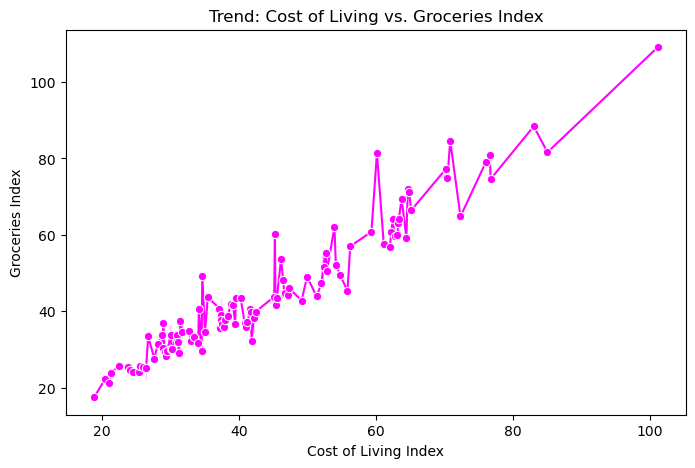

In [68]:
# 10. Line Plot: Cost of Living Index vs. Groceries Index
plt.figure(figsize=(8, 5))
sns.lineplot(x=df['Cost of Living Index'], y=df['Groceries Index'], marker='o', color='magenta')
plt.title("Trend: Cost of Living vs. Groceries Index")
plt.show()


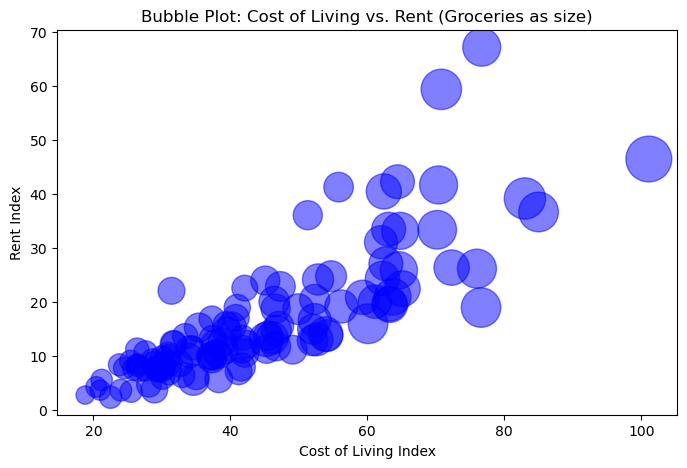

In [69]:
# 11. Bubble Plot: Cost of Living Index vs. Rent Index (with Groceries Index as size)
# Highlights the impact of groceries index on cost of living vs. rent
df['Size'] = df['Groceries Index'] * 10  # Scale size for better visibility
plt.figure(figsize=(8, 5))
plt.scatter(df['Cost of Living Index'], df['Rent Index'], s=df['Size'], alpha=0.5, color='blue')
plt.title("Bubble Plot: Cost of Living vs. Rent (Groceries as size)")
plt.xlabel("Cost of Living Index")
plt.ylabel("Rent Index")
plt.show()


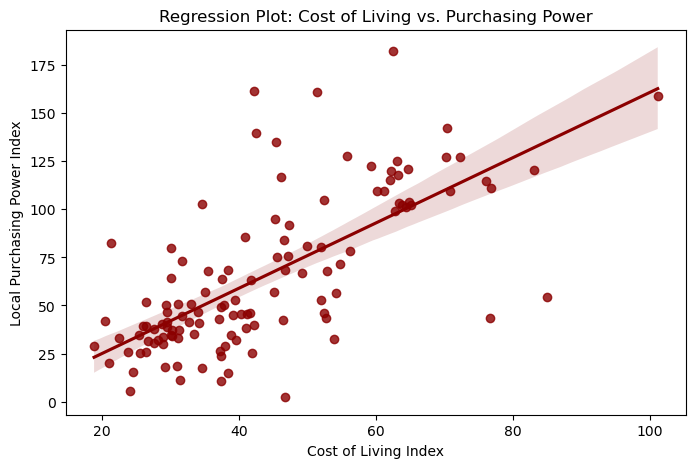

In [70]:
# 12. Regression Plot: Cost of Living vs. Local Purchasing Power
# Shows the linear relationship between cost of living and purchasing power
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Cost of Living Index'], y=df['Local Purchasing Power Index'], color='darkred')
plt.title("Regression Plot: Cost of Living vs. Purchasing Power")
plt.show()

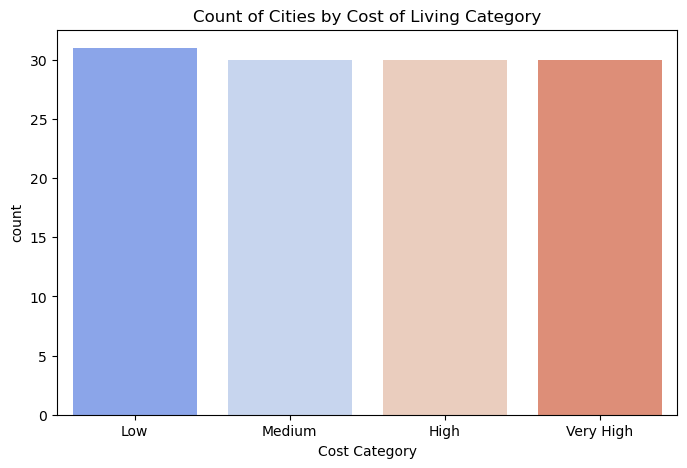

In [71]:
# 13. Categorical Count Plot: Distribution of Cities by Cost of Living Category
# Categorizes cities based on cost of living for better understanding
df['Cost Category'] = pd.qcut(df['Cost of Living Index'], q=4, labels=["Low", "Medium", "High", "Very High"])
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Cost Category'], palette='coolwarm')
plt.title("Count of Cities by Cost of Living Category")
plt.show()


In [72]:
df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Size,Cost Category
0,120,101.1,46.5,74.9,109.1,97.0,158.7,1091.0,Very High
1,71,85.0,36.7,61.8,81.6,83.3,54.6,816.0,Very High
2,85,83.0,39.2,62.0,88.4,86.8,120.3,884.0,Very High
3,96,76.7,67.2,72.1,74.6,50.4,111.1,746.0,Very High
4,19,76.6,19.0,48.9,80.8,69.4,43.5,808.0,Very High


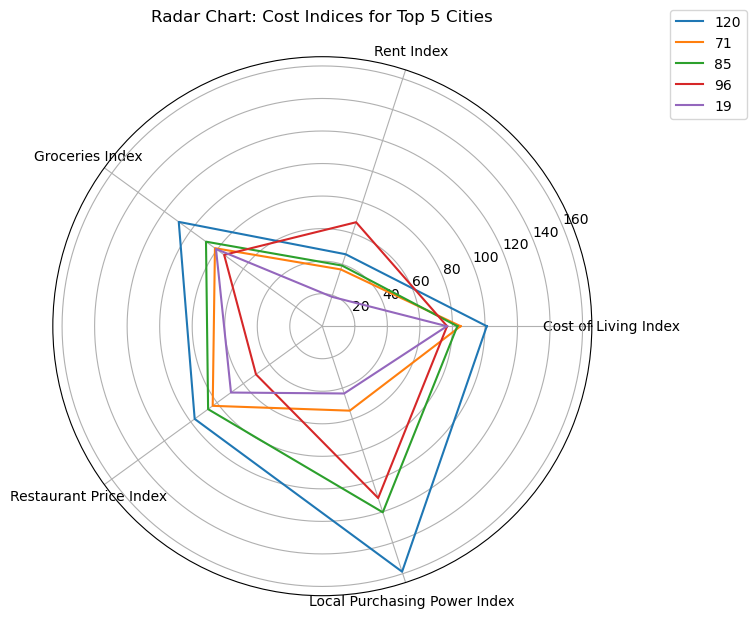

In [73]:
# 15. Radar Chart: Comparing a Few Cities Across All Indices
# Helps compare multiple dimensions for selected cities
from math import pi
cities = df.nlargest(5, 'Cost of Living Index')
categories = ['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']
n_categories = len(categories)
angles = [n / float(n_categories) * 2 * pi for n in range(n_categories)]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": "polar"})
for index, row in cities.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['City'])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Radar Chart: Cost Indices for Top 5 Cities")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


In [74]:
#Defining Dependent and independent variables

In [75]:
df = pd.read_csv(r'Dataset\Cost_of_Living_Index.csv')
df

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Zurich,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Nassau,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Reykjavik,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Bridgetown,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Dhaka,22.5,2.4,12.8,25.7,12.8,33.1
117,118,Mumbai,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Cairo,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Tripoli,20.4,4.3,12.7,22.2,15.2,42.0


In [76]:
df=df.drop(columns=['Rank'])
df.head(2)

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Zurich,101.1,46.5,74.9,109.1,97.0,158.7
1,Nassau,85.0,36.7,61.8,81.6,83.3,54.6


In [77]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])

## Data splittig

In [78]:
X=df.drop('Local Purchasing Power Index',axis=1)

In [79]:
X

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index
0,120,101.1,46.5,74.9,109.1,97.0
1,71,85.0,36.7,61.8,81.6,83.3
2,85,83.0,39.2,62.0,88.4,86.8
3,96,76.7,67.2,72.1,74.6,50.4
4,19,76.6,19.0,48.9,80.8,69.4
...,...,...,...,...,...,...
116,32,22.5,2.4,12.8,25.7,12.8
117,68,21.2,5.6,13.7,23.8,15.1
118,24,21.0,3.7,12.7,21.2,16.2
119,112,20.4,4.3,12.7,22.2,15.2


In [80]:
y=df['Local Purchasing Power Index']

In [81]:
y

0      158.7
1       54.6
2      120.3
3      111.1
4       43.5
       ...  
116     33.1
117     82.6
118     20.0
119     42.0
120     29.1
Name: Local Purchasing Power Index, Length: 121, dtype: float64

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X= selector.fit_transform(X, y)

In [83]:
#Datasplitting

In [84]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=44)

In [86]:
X_train.shape

(96, 5)

In [87]:
X_test.shape

(25, 5)

In [88]:
#Building a ML Model

In [89]:
# Define empty lists to store metrics
mse_list = []
mae_list = []
r2_list = []

In [93]:

# Function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    mse = mean_squared_error(testY, predict)
    mae = mean_absolute_error(testY, predict)
    r2 = r2_score(testY, predict) * 100
    # Append calculated metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    print(algorithm + ' Mean Squared Error: ' + str(mse))
    print(algorithm + ' Mean Absolute Error: ' + str(mae))
    print(algorithm + ' R^2 Score: ' + str(r2))
    # Create a scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(predict, testY, color='blue')
    plt.plot([min(testY), max(testY)], [min(testY), max(testY)], linestyle='--', color='red', lw=2)  # Identity line
    # Set labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression Performance')
    plt.show()


# Linear Regression 

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Model loaded successfully.
Linear Regression Mean Squared Error: 643.48
Linear Regression Mean Absolute Error: 18.28
Linear Regression R^2 Score: 59.30490233378936


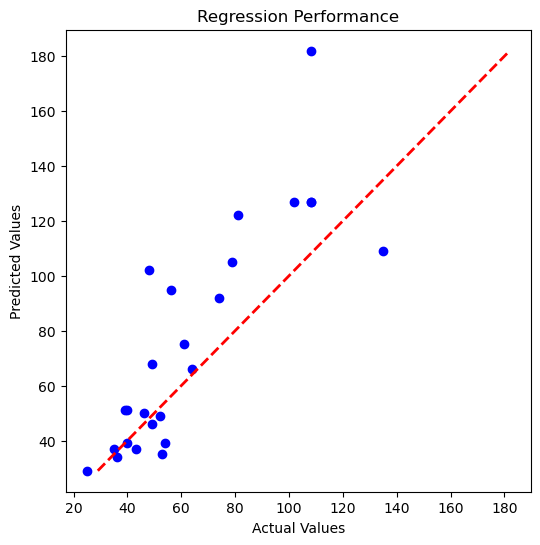

In [95]:
model_path = 'LinearRegression_model.pkl'

if os.path.exists(model_path):
    # Load the trained model
    model = joblib.load(model_path)
    print("Model loaded successfully.")
    predict = model.predict(X_test)
    calculateMetrics("Linear Regression", predict, y_test)
else:
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Save the trained model
    joblib.dump(model, model_path)
    print("Model saved successfully.")
    
    # Make predictions
    predict = model.predict(X_test)
    calculateMetrics("Linear Regression", predict, y_test)


#  Decision Tree Regressor

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Model loaded successfully.
Decision Tree Regressor Mean Squared Error: 0.0
Decision Tree Regressor Mean Absolute Error: 0.0
Decision Tree Regressor R^2 Score: 100.0


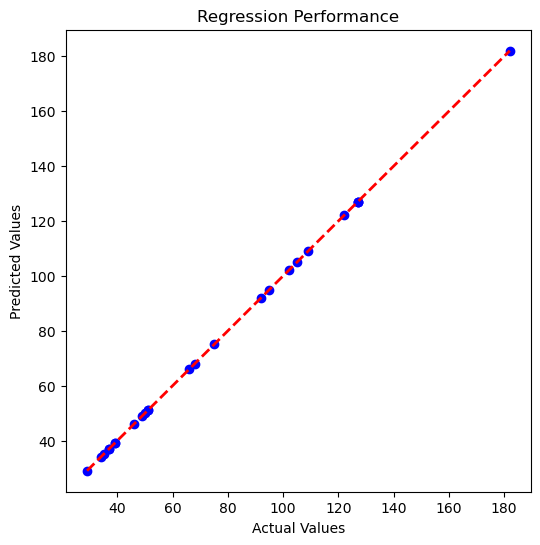

In [97]:

model_path= 'DecisionTreeRegressor_model.pkl'

if os.path.exists(model_path):
    # Load the trained model
    model = joblib.load(model_path)
    print("Model loaded successfully.")
    predict = model.predict(X_test)
    calculateMetrics("Decision Tree Regressor", predict, y_test)
else:
    # Train the model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Save the trained model
    joblib.dump(model, model_path)
    print("Model saved successfully.")
    
    # Make predictions
    predict = model.predict(X_test)
    calculateMetrics("Decision Tree Regressor", predict, y_test)


In [98]:
# prediction

In [99]:
test=pd.read_csv("dataset/test.csv")

In [100]:
test.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index
0,Zurich,101.1,46.5,74.9,109.1,97.0
1,Nassau,85.0,36.7,61.8,81.6,83.3
2,Reykjavik,83.0,39.2,62.0,88.4,86.8
3,Singapore,76.7,67.2,72.1,74.6,50.4
4,Bridgetown,76.6,19.0,48.9,80.8,69.4


In [101]:
test['City'] = le.fit_transform(test['City'])

In [102]:
test1= selector.transform(test)

In [103]:
# Make predictions on the selected test data
predictions = model.predict(test1)

# Loop through each prediction and print the corresponding row and prediction value
for i, prediction in enumerate(predictions):
    print(test.iloc[i])
    print("Row {}: Prediction =======> {}".format(i, prediction))


City                               52.0
Cost of Living Index              101.1
Rent Index                         46.5
Cost of Living Plus Rent Index     74.9
Groceries Index                   109.1
Restaurant Price Index             97.0
Name: 0, dtype: float64
Row 0: Prediction =======> 158.70000000000002
City                              24.0
Cost of Living Index              85.0
Rent Index                        36.7
Cost of Living Plus Rent Index    61.8
Groceries Index                   81.6
Restaurant Price Index            83.3
Name: 1, dtype: float64
Row 1: Prediction =======> 54.6
City                              32.0
Cost of Living Index              83.0
Rent Index                        39.2
Cost of Living Plus Rent Index    62.0
Groceries Index                   88.4
Restaurant Price Index            86.8
Name: 2, dtype: float64
Row 2: Prediction =======> 120.3
City                              39.0
Cost of Living Index              76.7
Rent Index                     

In [104]:
test['predict']=predictions

In [105]:
test

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,predict
0,52,101.1,46.5,74.9,109.1,97.0,158.7
1,24,85.0,36.7,61.8,81.6,83.3,54.6
2,32,83.0,39.2,62.0,88.4,86.8,120.3
3,39,76.7,67.2,72.1,74.6,50.4,111.1
4,5,76.6,19.0,48.9,80.8,69.4,43.5
5,27,76.0,26.2,52.1,79.0,73.5,114.7
6,7,72.3,26.4,50.2,64.8,81.3,127.2
7,13,70.8,59.4,65.3,84.6,46.2,109.3
8,25,70.4,41.7,56.6,75.0,67.2,142.3
9,41,70.2,33.4,52.5,77.3,62.5,127.4


## END